In [1]:
import sys
sys.path.append("src")

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [3]:
def load_data(lOAD: str) -> pd.DataFrame:
    """Load dataset from CSV file."""
    df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
    print(f"✅ Loaded dataset with {df.shape[0]} rows and {df.shape[1]} columns.")
    return df


def preprocess_data(df: pd.DataFrame):
    """Clean and preprocess the dataset."""
    df = df.copy()

    # Drop customer ID if present
    if 'customerID' in df.columns:
        df.drop('customerID', axis=1, inplace=True)

    # Handle missing values
    df.fillna(df.median(numeric_only=True), inplace=True)

    # Encode categorical variables
    label_encoders = {}
    for col in df.select_dtypes(include=['object']).columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le

    # Split data
    X = df.drop('Churn', axis=1)
    y = df['Churn']

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42, stratify=y
    )

    # Standardize numeric features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    print("✅ Data preprocessing complete.")
    return X_train_scaled, X_test_scaled, y_train, y_test, scaler, label_encoders


if __name__ == "__main__":
    df = load_data("../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")
    preprocess_data(df)

✅ Loaded dataset with 7043 rows and 21 columns.
✅ Data preprocessing complete.


In [4]:
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score

In [5]:
import data_preprocessing
print(dir(data_preprocessing))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__']


In [6]:
def train_model(X_train, y_train):
    """Train Random Forest classifier."""
    model = RandomForestClassifier(
        n_estimators=200,
        max_depth=10,
        random_state=42
    )
    model.fit(X_train, y_train)
    print("✅ Model training complete.")
    return model


def evaluate_model(model, X_test, y_test):
    """Evaluate model performance."""
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred)
    print(f"📈 Accuracy: {acc:.3f}, ROC-AUC: {auc:.3f}")
    return acc, auc


if __name__ == "__main__":
    df = load_data("../data/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")
    X_train, X_test, y_train, y_test, scaler, encoders = preprocess_data(df)

    model = train_model(X_train, y_train)
    evaluate_model(model, X_test, y_test)

    # Save model and preprocessing objects
    joblib.dump(model, "model/churn_model.pkl")
    joblib.dump(scaler, "model/scaler.pkl")
    joblib.dump(encoders, "model/encoders.pkl")
    print("💾 Model and preprocessing files saved in /model/")

✅ Loaded dataset with 7043 rows and 21 columns.
✅ Data preprocessing complete.
✅ Model training complete.
📈 Accuracy: 0.801, ROC-AUC: 0.709
💾 Model and preprocessing files saved in /model/


In [7]:
import joblib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

✅ Loaded dataset with 7043 rows and 21 columns.
✅ Data preprocessing complete.
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.66      0.51      0.58       374

    accuracy                           0.80      1409
   macro avg       0.75      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



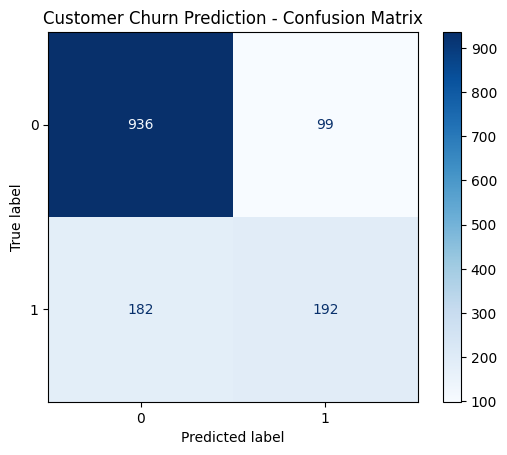

In [8]:
def evaluate():
    df = load_data("WA_Fn-UseC_-Telco-Customer-Churn.csv")
    X_train, X_test, y_train, y_test, scaler, encoders = preprocess_data(df)

    model = joblib.load("model/churn_model.pkl")

    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    print("📊 Classification Report:\n", classification_report(y_test, y_pred))

    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title("Customer Churn Prediction - Confusion Matrix")
    plt.show()


if __name__ == "__main__":
    evaluate()